In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

In [2]:
batch_size = 16

# IMAGE AUGMENTATION

In [3]:
data_aug = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> spliting dataset into training and test

In [13]:
train_data = tf.keras.utils.image_dataset_from_directory(
  "drive/MyDrive/flowers",
  validation_split=0.25,
  subset="training",
  seed=120,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3238 files for training.


In [23]:
val_data_set = tf.keras.utils.image_dataset_from_directory(
 "drive/MyDrive/flowers",
  validation_split=0.25,
  subset="validation",
  seed=120,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 1079 files for validation.


In [14]:
class_names = train_data.class_names

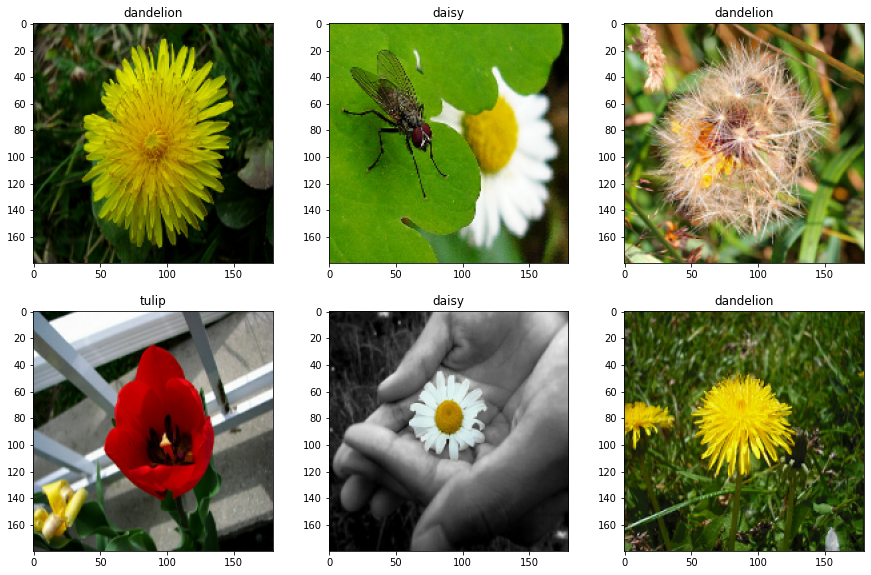

In [15]:
plt.figure(figsize=(15, 15))
for images, labels in train_data.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

> Normalizing pixel value from 0 - 255 to 0 - 1

In [17]:
normalization_layer = layers.Rescaling(1./255)

In [18]:
dataset_normalized = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(dataset_normalized))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


# MODEL CREATION AND ADDITION OF LAYERS


In [19]:
num_classes = len(class_names)

model = Sequential([
  data_aug,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,activation='relu'),
  layers.Conv2D(32, 3,activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# COMPLIATION OF MODEL

In [20]:
# compiling model with categorical cross entropy and adam optimizer
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

# FITTING THE MODEL

In [25]:
epochs=15
history = model.fit(train_data,validation_data=val_data_set,epochs=epochs)

Epoch 1/15
203/203 [==============================] - 288s 1s/step - loss: 1.4088 - accuracy: 0.3867 - val_loss: 1.1632 - val_accuracy: 0.5014
Epoch 2/15
203/203 [==============================] - 175s 860ms/step - loss: 1.1120 - accuracy: 0.5544 - val_loss: 1.0990 - val_accuracy: 0.5663
Epoch 3/15
203/203 [==============================] - 174s 854ms/step - loss: 0.9984 - accuracy: 0.6056 - val_loss: 1.0108 - val_accuracy: 0.6182
Epoch 4/15
203/203 [==============================] - 171s 841ms/step - loss: 0.9565 - accuracy: 0.6331 - val_loss: 0.9326 - val_accuracy: 0.6506
Epoch 5/15
203/203 [==============================] - 172s 845ms/step - loss: 0.9193 - accuracy: 0.6405 - val_loss: 0.8909 - val_accuracy: 0.6830
Epoch 6/15
203/203 [==============================] - 171s 839ms/step - loss: 0.8578 - accuracy: 0.6677 - val_loss: 0.9085 - val_accuracy: 0.6589
Epoch 7/15
203/203 [==============================] - 173s 849ms/step - loss: 0.8135 - accuracy: 0.6834 - val_loss: 0.8690 - va

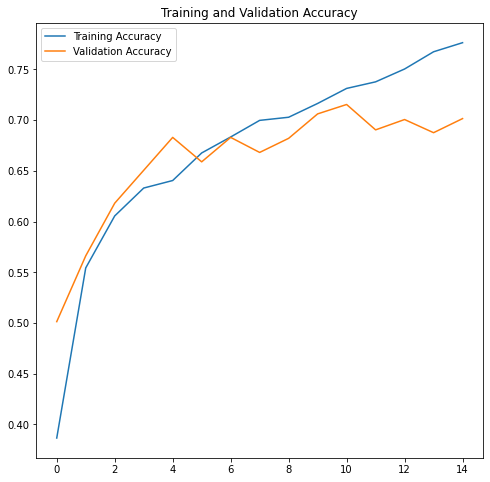

In [28]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

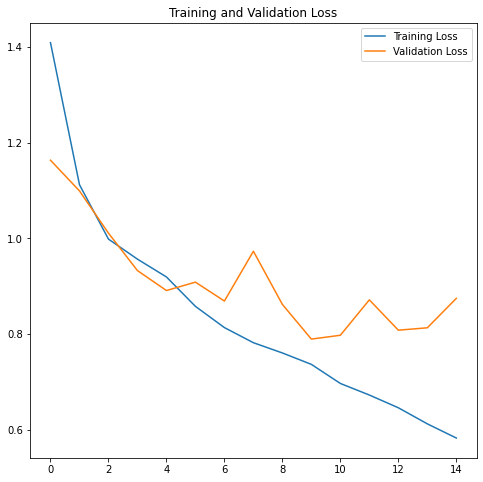

In [29]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# SAVING THE MODEL

In [30]:
model.save("./flowers.h5")

In [32]:
model.load_weights('./flowers.h5')

# TESTING THE MODEL

In [44]:

img = tf.keras.utils.load_img(
    "sun.jpg", target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])



print(class_names[np.argmax(score)],100 * np.max(score))

sunflower 91.51520729064941


**Assignment - Ranjith S**